In [ ]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from logger import Logger
from collector import Collector
from enricher import Enricher


: 

In [2]:
logger = Logger()
df = pd.DataFrame()
logger.info('Main','main','Inicializar clase Logger')
collector = Collector(logger=logger)
enricher = Enricher(logger=logger)

In [3]:
df_1 =collector.collertor_data()
df_2=enricher.calcular_kpi(df_1)
df_2

,fecha,abrir,max,min,cerrar,cierre_ajustado,volumen,volatilidad
5472,1 abr 2004,1.2312,1.2385,1.2259,1.2365,1.2365,NaN,0.000000
5212,1 abr 2005,1.2968,1.3043,1.2879,1.2909,1.2909,NaN,0.000000
4192,1 abr 2009,1.3245,1.3279,1.3176,1.3241,1.3241,NaN,0.000000
3931,1 abr 2010,1.3508,1.3591,1.3463,1.3584,1.3584,NaN,0.000000
3670,1 abr 2011,1.4160,1.4215,1.4065,1.4159,1.4159,NaN,0.067776
...,...,...,...,...,...,...,...,...
1474,9 sept 2019,1.1021,1.1065,1.1016,1.1021,1.1021,NaN,0.103112
1212,9 sept 2020,1.1769,1.1831,1.1754,1.1770,1.1770,NaN,0.075637
951,9 sept 2021,1.1820,1.1841,1.1806,1.1819,1.1819,NaN,0.035653
690,9 sept 2022,1.0012,1.0112,1.0009,1.0012,1.0012,NaN,0.073386


In [4]:
df_3=enricher.formatear_fechas(df_2)
df_3

,fecha,abrir,max,min,cerrar,cierre_ajustado,volumen,volatilidad,year,month,day,year_month
5472,2004-04-01,1.2312,1.2385,1.2259,1.2365,1.2365,NaN,0.000000,2004,4,1,2004-04
5212,2005-04-01,1.2968,1.3043,1.2879,1.2909,1.2909,NaN,0.000000,2005,4,1,2005-04
4192,2009-04-01,1.3245,1.3279,1.3176,1.3241,1.3241,NaN,0.000000,2009,4,1,2009-04
3931,2010-04-01,1.3508,1.3591,1.3463,1.3584,1.3584,NaN,0.000000,2010,4,1,2010-04
3670,2011-04-01,1.4160,1.4215,1.4065,1.4159,1.4159,NaN,0.067776,2011,4,1,2011-04
...,...,...,...,...,...,...,...,...,...,...,...,...
1474,2019-09-09,1.1021,1.1065,1.1016,1.1021,1.1021,NaN,0.103112,2019,9,9,2019-09
1212,2020-09-09,1.1769,1.1831,1.1754,1.1770,1.1770,NaN,0.075637,2020,9,9,2020-09
951,2021-09-09,1.1820,1.1841,1.1806,1.1819,1.1819,NaN,0.035653,2021,9,9,2021-09
690,2022-09-09,1.0012,1.0112,1.0009,1.0012,1.0012,NaN,0.073386,2022,9,9,2022-09


In [6]:
df = df_3[["fecha", "cierre_ajustado"]]
df.set_index('fecha', inplace=True)
df.head()

,cierre_ajustado
fecha,
2004-04-01,1.2365
2005-04-01,1.2909
2009-04-01,1.3241
2010-04-01,1.3584
2011-04-01,1.4159


# Visualización

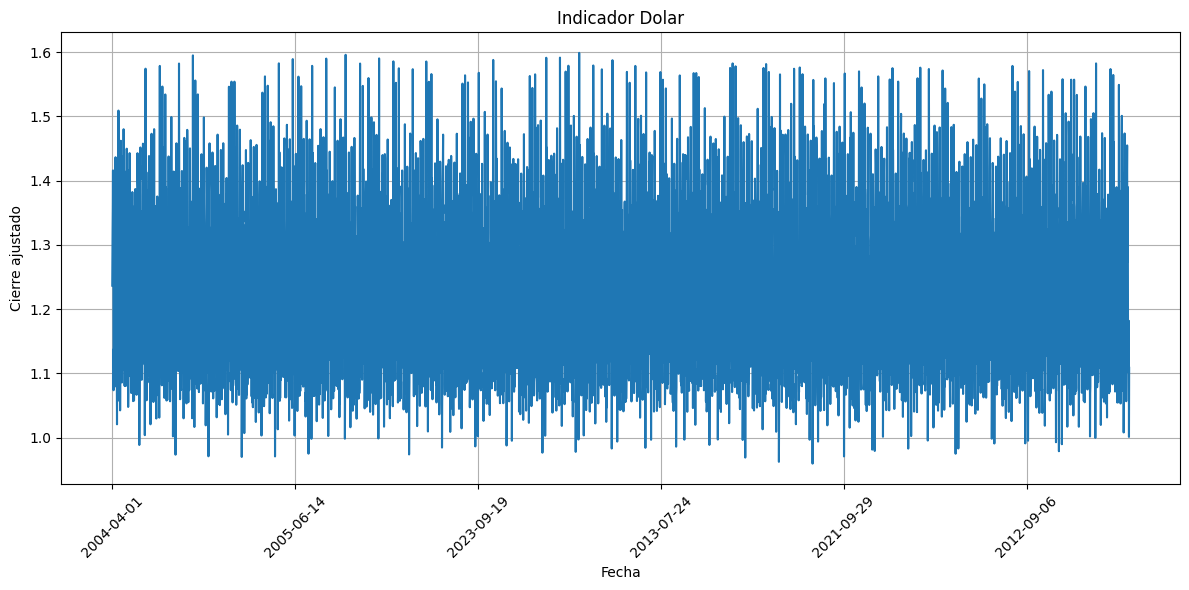

In [12]:
plt.figure(figsize=(12, 6))
df['cierre_ajustado'].plot(figsize=(12, 6), label='Cierre ajustado')
plt.title('Indicador Dolar')
plt.xlabel('Fecha')
plt.ylabel('Cierre ajustado')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

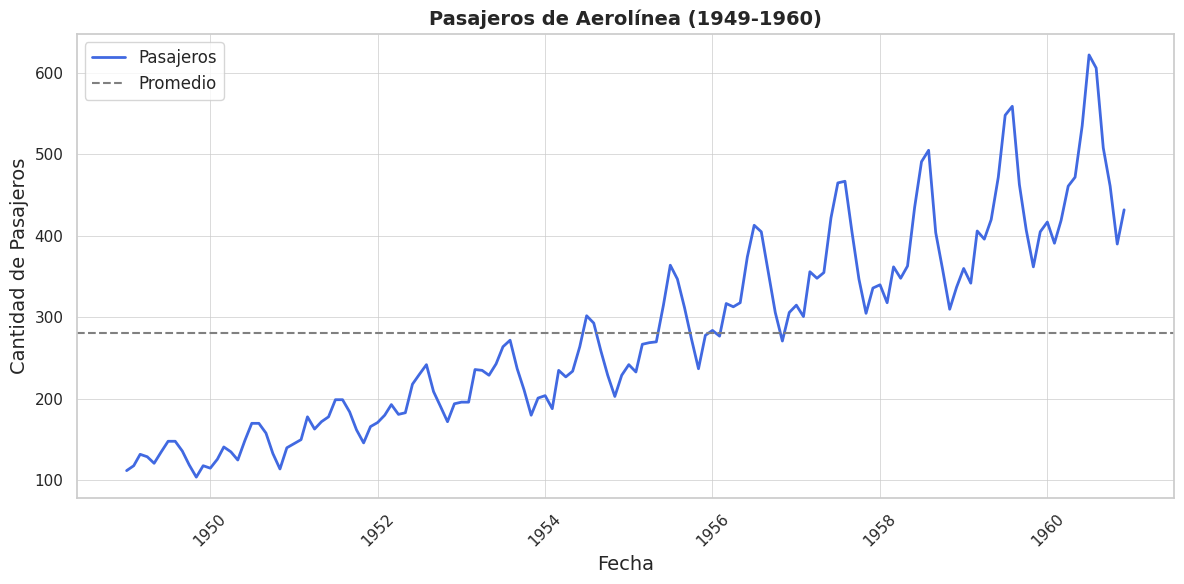

In [ ]:
# Visualización con Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.plot(df.index, df['Passengers'], color='royalblue', linewidth=2, label='Pasajeros')

plt.title('Pasajeros de Aerolínea (1949-1960)', fontsize=14, fontweight='bold')
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad de Pasajeros', fontsize=14)

plt.axhline(y=df['Passengers'].mean(), color='gray', linestyle='--', label='Promedio')

plt.legend(loc='upper left', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()


# Descomposición estacional
La descomposición estacional separa una serie temporal en tres componentes principales: **tendencia, estacionalidad y residuos**. Esto ayuda a entender mejor los patrones subyacentes y a mejorar los modelos predictivos.

**Tendencia:** Muestra el patrón a largo plazo en los datos.

**Estacionalidad:** Refleja los ciclos periódicos o fluctuaciones regulares.

**Residuos:** Son las variaciones aleatorias o "ruido" no explicadas por la tendencia o estacionalidad.

El método *seasonal_decompose* de *statsmodels* realiza esta descomposición. En nuestro caso, usamos el modelo multiplicativo, lo que significa que la serie es el producto de estos tres componentes.

<Figure size 1200x800 with 0 Axes>

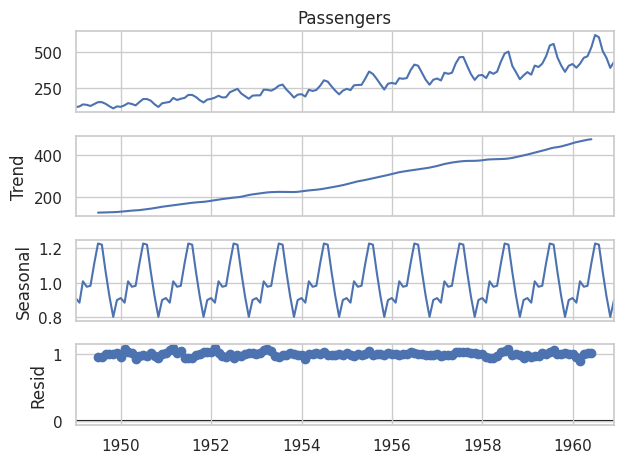

In [ ]:
# Descomposición de la serie temporal
decomposition = seasonal_decompose(df['Passengers'], model='multiplicative', period=12)

# Graficar los componentes de la descomposición
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.tight_layout()
plt.show()

# ¿Cómo usar la descomposición para predecir?
**Predicción de la Tendencia:** Una vez identificada la tendencia a largo plazo, puedes proyectar el comportamiento futuro de la serie temporal por ejemplo, crecimiento o disminución.

**Predicción de la Estacionalidad:** Al analizar la componente estacional, puedes prever fluctuaciones regulares como picos durante vacaciones o días festivos. (Anomalias)

**Modelado de Residuos:** Si los residuos muestran patrones no aleatorios, puedes investigar estos patrones y usarlos para mejorar las predicciones. (Filtros)

# Estacionariedad

En una serie temporal, la estacionariedad significa que las propiedades estadísticas como la media, varianza y autocorrelación no cambian con el tiempo. Las series estacionarias son más fáciles de modelar y predecir.

**Test de Estacionariedad: Dickey-Fuller Aumentado (ADF)**

Este test nos ayuda a saber si una serie temporal es estacionaria (es decir, si su comportamiento no cambia mucho a lo largo del tiempo).

**¿Cómo interpretarlo?**

- Si el **p-valor > 0.05** la serie **NO es estacionaria**.
- Si el **p-valor ≤ 0.05** la serie **SÍ es estacionaria**.


In [ ]:
result = adfuller(df['Passengers'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f' {key}: {value}')

if result[1] > 0.05:
    print("\nLa serie NO es estacionaria (p-valor > 0.05)")
else:
    print("\nLa serie es estacionaria (p-valor <= 0.05)")

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values:
 1%: -3.4816817173418295
 5%: -2.8840418343195267
 10%: -2.578770059171598

La serie NO es estacionaria (p-valor > 0.05)


In [ ]:
# Serie diferenciada
df_diff = df['Passengers'].diff().dropna()
df_diff


,Passengers
Date,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [ ]:
# Con la serie diferenciada
result_diff = adfuller(df_diff)
print("ADF Statistic:", result_diff[0])
print("p-value:", result_diff[1])
print("Critical Values:")
for key, value in result_diff[4].items():
    print(f' {key}: {value}')

if result_diff[1] > 0.05:
    print("\nLa serie diferenciada NO es estacionaria")
else:
    print("\nLa serie diferenciada es estacionaria")

ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478
Critical Values:
 1%: -3.4816817173418295
 5%: -2.8840418343195267
 10%: -2.578770059171598

La serie diferenciada NO es estacionaria


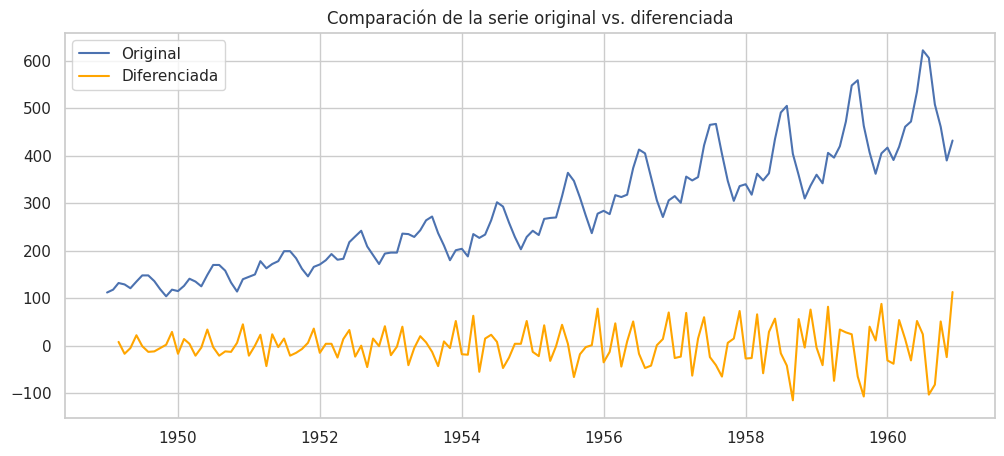

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df['Passengers'], label='Original')
plt.plot(df_diff2, label='Diferenciada', color='orange')
plt.title('Comparación de la serie original vs. diferenciada')
plt.legend()
plt.grid(True)
plt.show()

Si la serie diferenciada aún no es estacionaria, podemos aplicar una segunda diferenciación o transformaciones como logaritmicas. También podemos usar modelos más flexibles que no requieren estrictamente estacionariedad. Lo importante es asegurarnos de que el modelo que elijamos se adapte al comportamiento de la serie.

In [ ]:
df_diff2 = df_diff.diff().dropna()
df_diff2.head()

,Passengers
Date,
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0
1949-07-01,-1.0


In [ ]:
result_diff2 = adfuller(df_diff2)
print("ADF Statistic (segunda diferencia):", result_diff2[0])
print("p-value:", result_diff2[1])

if result_diff2[1] > 0.05:
    print("\nLa serie aún NO es estacionaria")
else:
    print("\nLa serie es estacionaria con segunda diferenciación")


ADF Statistic (segunda diferencia): -16.384231542468513
p-value: 2.7328918500142026e-29

La serie es estacionaria con segunda diferenciación


**Primera diff:** elimina tendencia lineal.

**Segunda diff:** elimina tendencia cuadrática o comportamientos más complejos.




Una vez evaluada la estacionariedad, es fundamental analizar cómo los valores pasados de la serie se relacionan entre sí. Para esto se utilizan dos herramientas estadísticas clave:

# **Función de Autocorrelación (ACF)**
La ACF mide la correlación entre los valores actuales de la serie y sus valores pasados (rezagos). Nos ayuda a detectar patrones repetitivos o dependencias temporales. Es especialmente útil para identificar el orden del componente de media móvil (MA) en un modelo ARIMA.

# **Función de Autocorrelación Parcial (PACF)**
La PACF mide la correlación entre un valor y su rezago, eliminando la influencia de los rezagos intermedios. Es útil para identificar el orden del componente autorregresivo (AR) en modelos ARIMA.

Ambas funciones nos permiten visualizar la estructura de dependencia temporal en la serie y guiar la selección de los parámetros adecuados para los modelos predictivos.

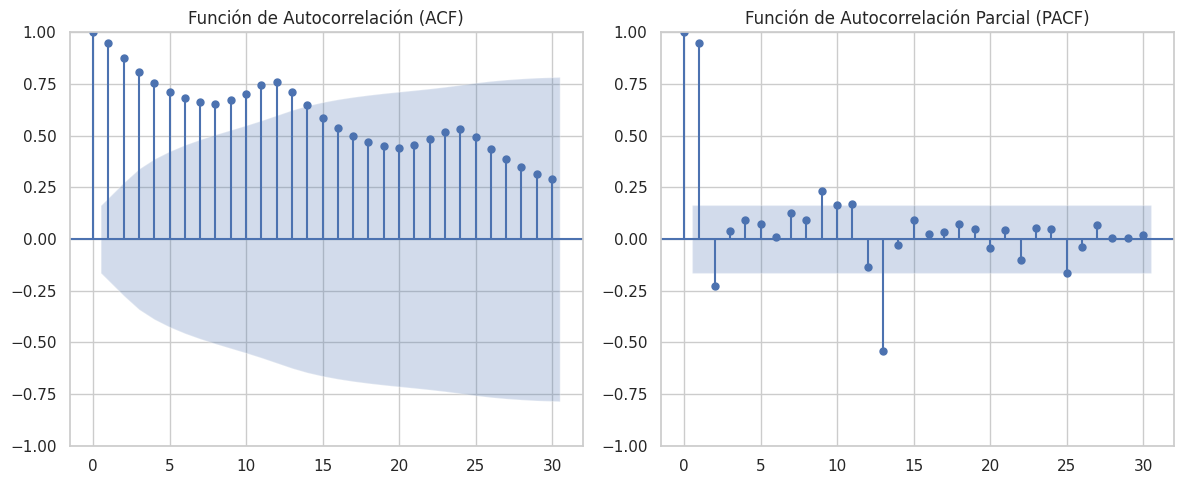

In [ ]:
serie = df['Passengers']
plt.figure(figsize=(12,5))

# ACF
plt.subplot(1, 2, 1)
plot_acf(serie, lags=30, ax=plt.gca())
plt.title('Función de Autocorrelación (ACF)')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(serie, lags=30, ax=plt.gca(), method='ywm')  # ywm = Yule-Walker-MLE
plt.title('Función de Autocorrelación Parcial (PACF)')

plt.tight_layout()
plt.show()


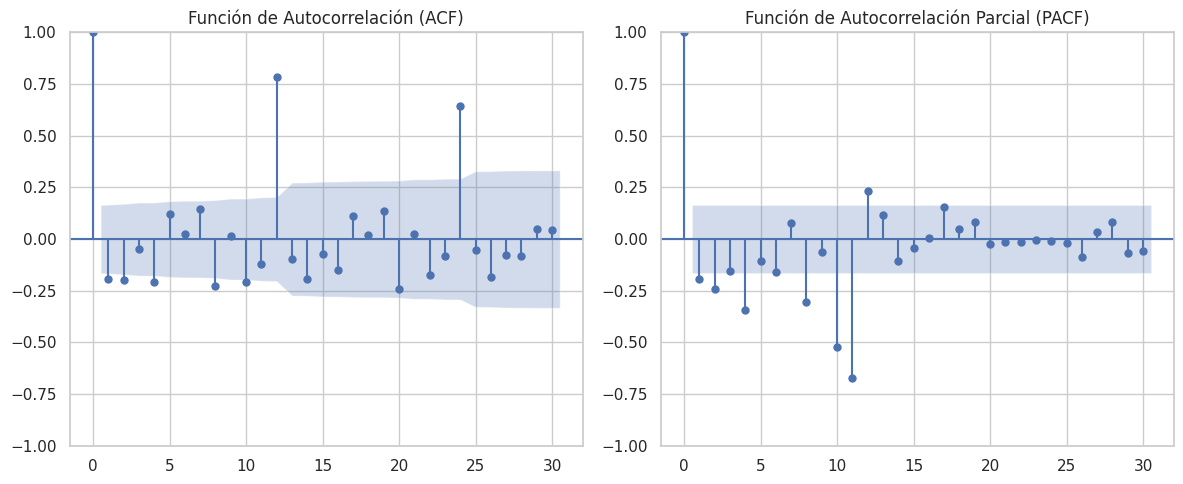

In [ ]:
serie = df['Passengers']

plt.figure(figsize=(12,5))

# ACF
plt.subplot(1, 2, 1)
plot_acf(df_diff2, lags=30, ax=plt.gca())
plt.title('Función de Autocorrelación (ACF)')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(df_diff2, lags=30, ax=plt.gca(), method='ywm')
plt.title('Función de Autocorrelación Parcial (PACF)')

plt.tight_layout()

### Estacionariedad y transformación de la serie

En las gráficas ACF y PACF iniciales, observamos una clara señal de **no estacionariedad**, ya que las autocorrelaciones decrecen lentamente y muchas están fuera del intervalo de confianza. Esto indica la presencia de una **tendencia persistente**.

Tras aplicar una **segunda diferenciación**, las nuevas gráficas muestran un comportamiento mucho más estable: la mayoría de los valores de ACF y PACF se encuentran dentro del intervalo de confianza, lo cual sugiere que la serie **ha alcanzado la estacionariedad**.

Este análisis se alinea con los resultados del test ADF, que también confirma estacionariedad tras la segunda diferencia. Con esta transformación, la serie está lista para ser modelada.


#**Tipos de modelos**

**Promedio móvil**
El modelo de promedio móvil simple suaviza una serie temporal al calcular el promedio de una ventana de observaciones consecutivas.
Es útil para eliminar fluctuaciones de corto plazo y resaltar tendencias de largo plazo.

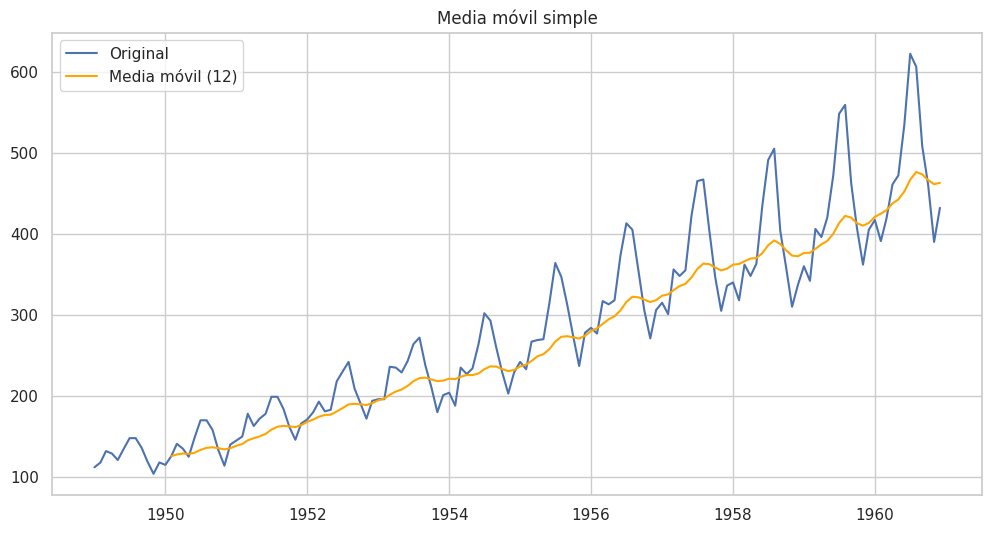

In [ ]:
# Suavizado con media móvil simple (ej: ventana de 12 períodos)
df['MA_12'] = df['Passengers'].rolling(window=14).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Passengers'], label='Original')
plt.plot(df['MA_12'], label='Media móvil (12)', color='orange')
plt.title('Media móvil simple')
plt.legend()
plt.show()


El **suavizado exponencial** simple asigna más peso a observaciones recientes usando un coeficiente de suavizado α.
El modelo es adecuado para series sin tendencia ni estacionalidad.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


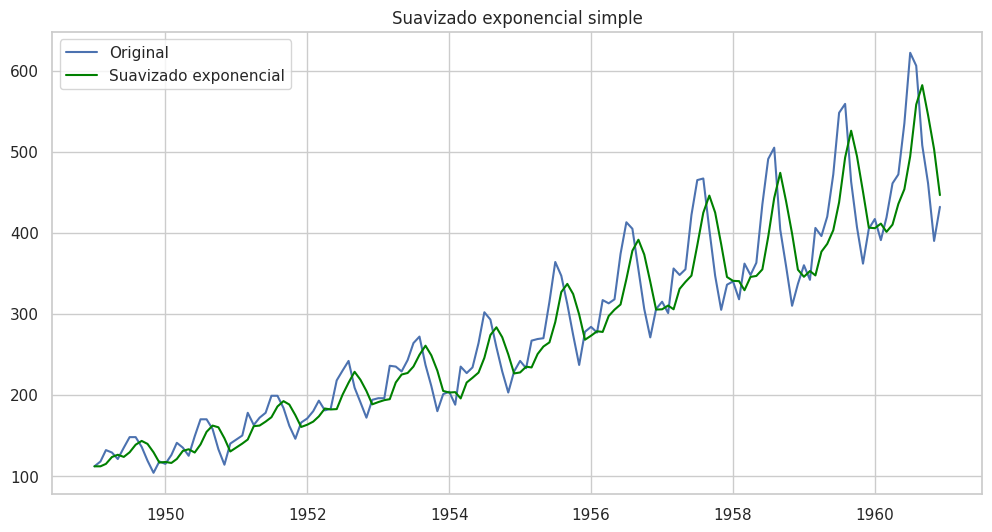

In [ ]:
model_ses = SimpleExpSmoothing(df['Passengers']).fit(smoothing_level=0.5, optimized=False)
df['SES'] = model_ses.fittedvalues

plt.figure(figsize=(12,6))
plt.plot(df['Passengers'], label='Original')
plt.plot(df['SES'], label='Suavizado exponencial', color='green')
plt.title('Suavizado exponencial simple')
plt.legend()
plt.show()
